(statistics-hs:random-variables:sampling)=
# Campionamento



# Media campionaria
La media campionaria di $N$ campioni indipendenti identicametne distribuiti,

$$\bar{X}_N = \frac{1}{N} \sum_{n=1}^{N} X_n \ ,$$

è una variabile casuale, che può essere usata come **stimatore senza bias della media** della popolazione. Uno **stimatore senza bias della varianza** è definito

$$\hat{\sigma}^2_N = \frac{1}{N-1} \sum_{n=1}^N (X_n - \bar{X}_N)^2 \ .$$

# Dimensione del campione, teorema del limite centrale e distribuzione $t$-Student
La media di $N$ variabili iid con media $\mu$ e varianza $\sigma^2$ è una variabile casuale, la cui distribuzione di probabilità tende alla distribuzione normale $\mathscr{N}\left(\mu, \frac{\sigma^2}{N} \right)$ per $N \rightarrow \infty$.

Per un numero di campioni ridotti, nel caso la popolazione sia formata da variabili iid con distribuzione gaussiana, la distribuzione della variabile

$$T_N = \frac{\bar{X} - \hat{X}}{\frac{\hat{\sigma}}{\sqrt{N}}} \ ,$$

costruita con gli stimatori non-biased della media e della varianza, è una variabile casuale con distribuzione **$t$-Student** con $N-1$ gradi di libertà. Al tendere di $N \rightarrow \infty$, gli stimatori senza bias tendono ai valori veri delle statistiche della popolazione, e la variabile 

$$\frac{\bar{X} - \hat{X}}{\frac{\hat{\sigma}}{\sqrt{N}}} \sim \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{N}}} \ ,$$

tende alla distribuzione normale $\mathscr{N}(0,1)$

In [1]:
#

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


def sample_to_pdf(x, bins=100, density=True):
  """ evaluate pdf, from histogram, and normalizing with uniform integration rule """
  hist, bin_edges = np.histogram(x, bins=bins, density=True)   # get data from histogram
  bin_cen = 0.5 * ( bin_edges[:-1] + bin_edges[1:] )           # bin center
  d_bin = bin_edges[1:] - bin_edges[:-1]                       # bin widt
  pdf = hist / np.sum(hist * d_bin)                           # normalization to get int pdf = 1
  return pdf, bin_cen


In [2]:
#> Population size
pop_size = 1000000

#> Random number generators
pop_distribution = 'normal'

if ( pop_distribution == 'uniform'):
    rng = np.random.default_rng().uniform   # Uniform distribution
    rng_params = { 'low': -1. , 'high': 1., 'size': pop_size }
else: # 'normal by default'
    rng = np.random.default_rng().normal    # Normal distribution
    rng_params = { 'loc': 0. , 'scale': 1., 'size': pop_size }

#> Generate population
pop = rng(**rng_params)

(-5.0, 5.0)

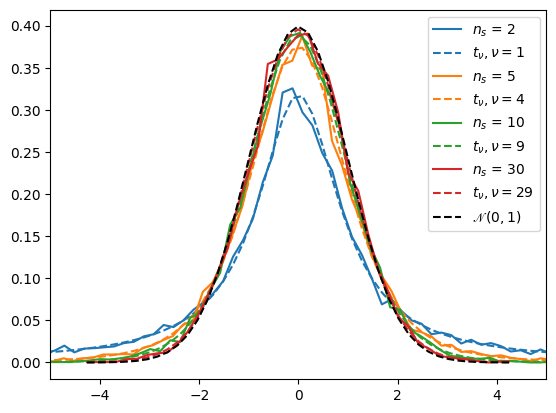

In [3]:
sample_size = [ 2, 5, 10, 30 ]
n_samples   = 10000

sample_avgs = []
sample_vars = []
for s_s in sample_size:
    sample_avg = []
    sample_var = []
    for i_s in np.arange(n_samples):
        sample_avg += [ np.mean(pop[i_s*s_s:(i_s+1)*s_s]) ]
        sample_var += [ np.var(pop[i_s*s_s:(i_s+1)*s_s], ddof=1) ]

    sample_avgs += [ sample_avg ]
    sample_vars += [ sample_var ]

# print(sample_avgs)

plt.figure()
for is_s in np.arange(len(sample_size)):
    ns = sample_size[is_s]
    var = np.array( sample_vars[is_s] ) / ns
    scaled = sample_avgs[is_s]/var**.5
    bin_width = .2; n_bins = int((np.max(scaled)-np.min(scaled))/bin_width)
    f, x = sample_to_pdf(scaled, bins=n_bins)
    plt.plot(x,f, color=plt.cm.tab10(is_s), label=f"$n_s$ = {ns}")
    plt.plot(x, sp.stats.t.pdf(x, ns-1, loc=0, scale=1), '--', color=plt.cm.tab10(is_s), label=f"$t_\\nu, \\nu ={ns-1}$")
plt.plot(x, sp.stats.norm.pdf(x, loc=0, scale=1), '--', color='black', label="$\mathscr{N}(0,1)$")
plt.legend()
plt.xlim(-5,5)